In [5]:
import pandas as pd

데이터 가져오기

In [72]:
df = pd.read_csv("~/../../mnt/d/Dataset/dataset/kaggle/bike-sharing-demand/train.csv")
display(df)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


년, 월, 일, 시간, 분, 초 칼럼 생성하기

In [73]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df["minute"] = df["datetime"].dt.minute
df["second"] = df["datetime"].dt.second
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


시간 데이터 시각화 하기

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df["year"].unique()

array([2011, 2012])

<Axes: xlabel='second', ylabel='count'>

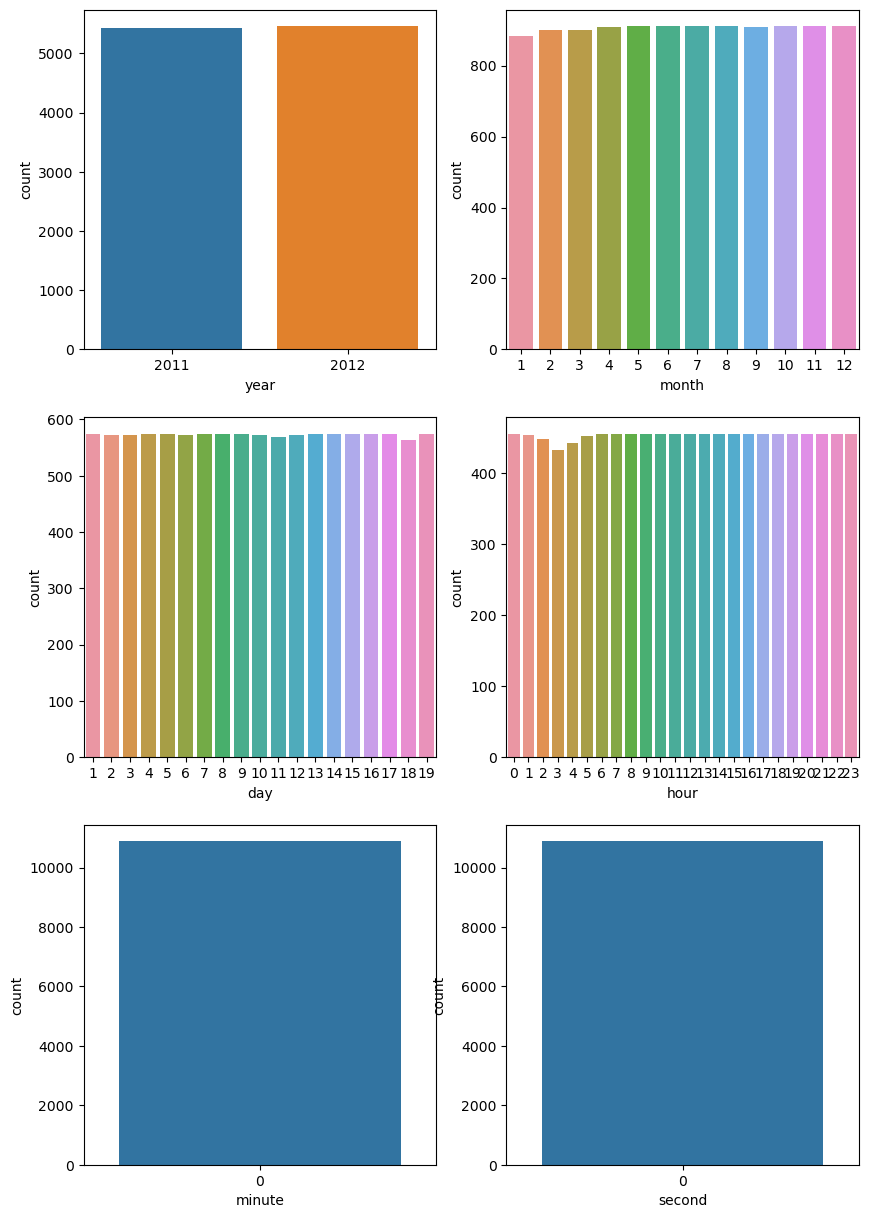

In [76]:
fig = plt.figure(figsize=(10,15))
plt.subplot(3,2,1)
sns.countplot(x=df["year"])
plt.subplot(3,2,2)
sns.countplot(x=df["month"])
plt.subplot(3,2,3)
sns.countplot(x=df["day"])
plt.subplot(3,2,4)
sns.countplot(x=df["hour"])
plt.subplot(3,2,5)
sns.countplot(x=df["minute"])
plt.subplot(3,2,6)
sns.countplot(x=df["second"])

TTS

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["count","minute","second","datetime"]), df["count"], test_size=0.2)

In [110]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8708, 14), (8708,), (2178, 14), (2178,))

Linear Regression

In [111]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

손실계산

In [112]:
from sklearn.metrics import mean_squared_error, accuracy_score

print("MSE : ", mean_squared_error(y_test, y_pred))
print("RMSE : ", mean_squared_error(y_test, y_pred)**0.5 )

MSE :  1.2345906494822923e-24
RMSE :  1.1111213477754318e-12


결과 시각화

<Axes: xlabel='humidity', ylabel='count'>

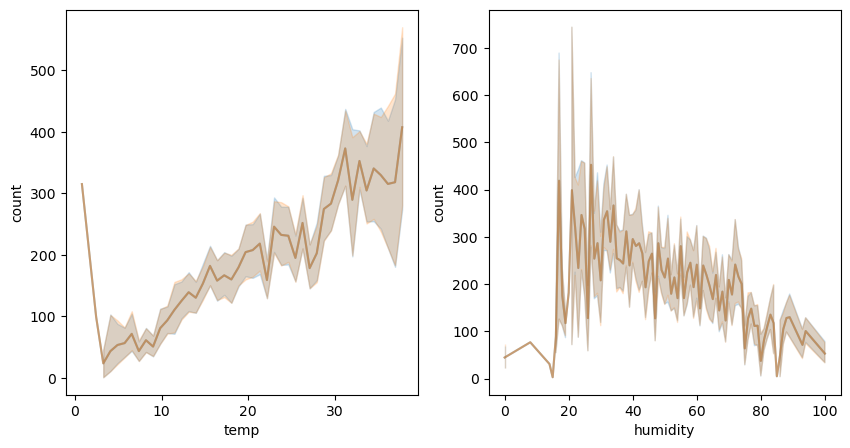

In [114]:
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
sns.lineplot(x=X_test["temp"], y=y_test, ax=ax1, alpha=0.5)
sns.lineplot(x=X_test["temp"], y=y_pred, ax=ax1, alpha=0.5)
ax2 = plt.subplot(1,2,2)
sns.lineplot(x=X_test["humidity"], y=y_test, ax=ax2, alpha=0.5)
sns.lineplot(x=X_test["humidity"], y=y_pred, ax=ax2, alpha=0.5)